In [178]:
#import the libraries we need: pandas and geopy
import pandas as pd
import geopy as gp
from geopy.distance import great_circle as gc
import plotly.express as px


In [179]:
#read in googlesheet file with all Australian cities and put into a dataframe
filepath = "https://docs.google.com/spreadsheets/d/1H1O18UQpdVyK5IJuTdQfEUf33SywMg4_KwywGBNfKGI/export?format=csv&gid=0"
df = pd.read_csv(filepath)

In [180]:
#clean up the file with only columns we need + rename headers 
df=df.drop(columns=["capital","iso2","country"])
df=df.rename(columns = {'admin_name':'state'})
# convert lat from negative to positive
df['lat'] = df['lat'] * -1


In [181]:
#making a new column with the latlon of each city in a tuple
df['latlng_tup'] = list(zip(df['lat'], df['lng']))


In [182]:
# conevrt the latlon tuples into a list so we can loop over with each city 
latlon = df['latlng_tup'].tolist()
poplist= df['population'].tolist()


In [183]:
 # Cooridinates of Nuclear sites 
Tarong = (26.7713, 151.8665)
Collie= (33.3631, 116.1556)
Callide= (24.3333, 150.6167)
Liddell= (32.3833, 150.9833)
MtPiper= (33.3500, 150.0167)
LoyYang= (38.2333, 146.5833)
PortAugusta= (32.4900, 137.7700)
  
 

In [184]:
#Create a list with the distance from the city to the nuclear site
Taronglist = []
Collielist=  []
Callidelist=  []
Liddellist=  []
MtPiperlist=  []
LoyYanglist=  []
PortAugustalist=  []

# take citie cooridantes, and calculate the distance to the nuclear site using geopy.distance
for tup in latlon:
    r1 = round((gc(Tarong, tup).km))
    r2 = round((gc(Collie, tup).km))
    r3 = round((gc(Callide, tup).km))
    r4 = round((gc(Liddell, tup).km))
    r5 = round((gc(MtPiper, tup).km))
    r6 = round((gc(LoyYang, tup).km))
    r7 = round((gc(PortAugusta, tup).km))
    
    # add the distance (city to nuclear site) to its relevant list
    Taronglist.append(r1)
    Collielist.append(r2)
    Callidelist.append(r3)
    Liddellist.append(r4)
    MtPiperlist.append(r5)
    LoyYanglist.append(r6)
    PortAugustalist.append(r7)

In [185]:
# put the nuclear site lists into a another list and merge them with a list of headers--- add columns back into dataframe.
lists_to_add = [Taronglist,Collielist,Callidelist, Liddellist,MtPiperlist,LoyYanglist,PortAugustalist]
column_names = ['Tarong', 'Collie', 'Callide','Liddel', 'MtPiper', 'LoyYang', 'PortAugusta']

for col_name, sublist in zip(column_names, lists_to_add):
    df[col_name] = sublist

In [186]:
#Create dataframes for each nuclear site and set X as the distance in kilometres
x= 100

In [187]:
Tarongdf = df[df['Tarong'] < x]
Colliedf= df[df['Collie'] < x]
Callidedf= df[df['Callide'] < x]
Liddelldf= df[df['Liddel'] < x]
MtPiperdf= df[df['MtPiper'] < x]
LoyYangdf= df[df['LoyYang'] < x]
PortAugustadf= df[df['PortAugusta'] < x]

In [188]:
df.tail()

,city,lat,lng,state,population,latlng_tup,Tarong,Collie,Callide,Liddel,MtPiper,LoyYang,PortAugusta
1030,The Palms,26.1902,152.5861,Queensland,1010,"(26.1902, 152.5861)",96,3586,286,706,834,1452,1596
1031,Millfield,32.8886,151.2614,New South Wales,1006,"(32.8886, 151.2614)",683,3254,953,62,127,729,1262
1032,Dunbogan,31.6500,152.8167,New South Wales,1002,"(31.65, 152.8167)",550,3425,842,191,324,926,1420
1033,Tomakin,35.8228,150.1894,New South Wales,1001,"(35.8228, 150.1894)",1019,3112,1278,389,275,417,1200
1034,Currie,39.9311,143.8510,Tasmania,768,"(39.9311, 143.851)",1640,2565,1846,1055,915,302,990


In [189]:
#we now have a dataframe with all the City distance from each nuclear site.
df.head()

,city,lat,lng,state,population,latlng_tup,Tarong,Collie,Callide,Liddel,MtPiper,LoyYang,PortAugusta
0,Sydney,33.8650,151.2094,New South Wales,5312163,"(33.865, 151.2094)",791,3231,1061,166,124,639,1259
1,Melbourne,37.8136,144.9631,Victoria,5078193,"(37.8136, 144.9631)",1388,2641,1592,815,674,149,882
2,Brisbane,27.4678,153.0281,Queensland,2514184,"(27.4678, 153.0281)",139,3577,424,581,715,1339,1570
3,Perth,31.9522,115.8589,Western Australia,2059484,"(31.9522, 115.8589)",3520,159,3496,3291,3187,2867,2058
4,Adelaide,34.9289,138.6011,South Australia,1345777,"(34.9289, 138.6011)",1555,2069,1652,1180,1065,801,282


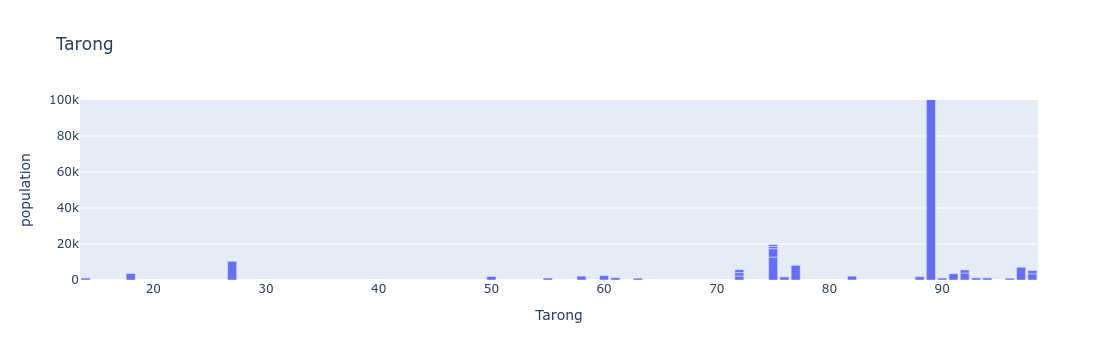

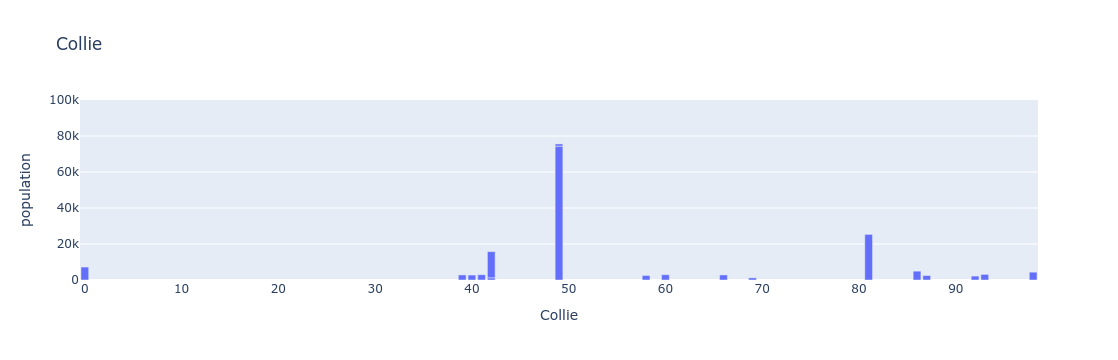

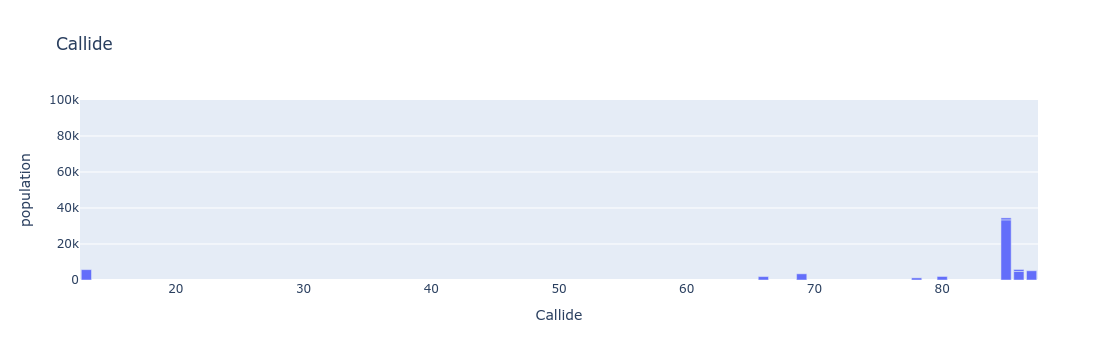

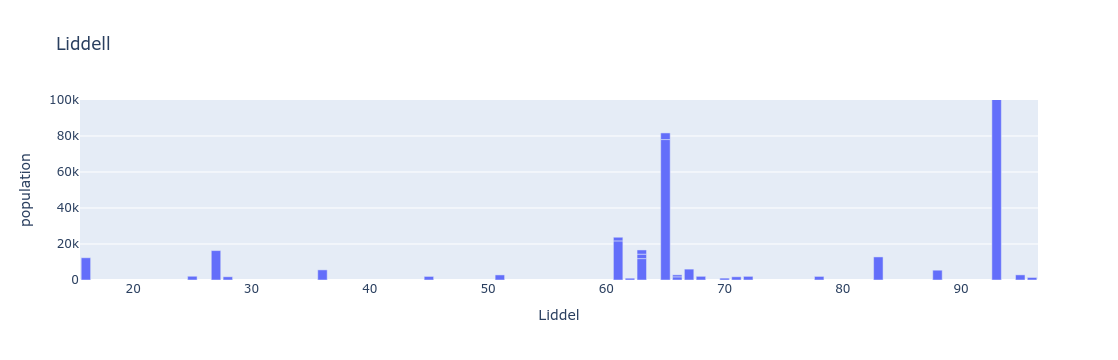

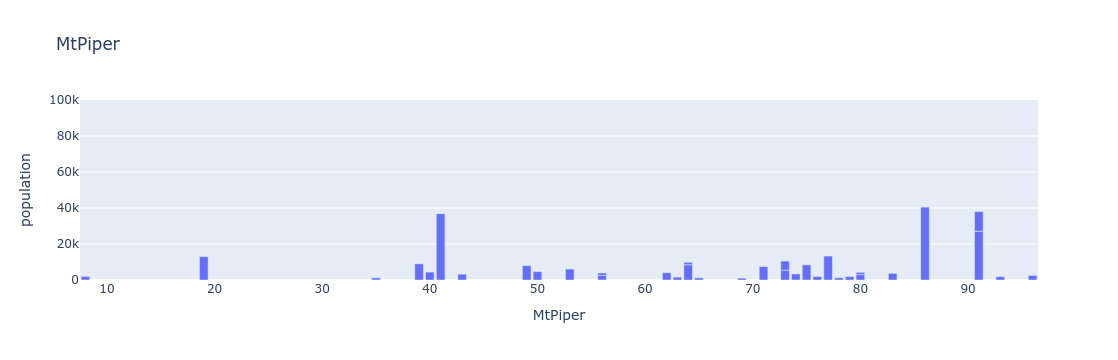

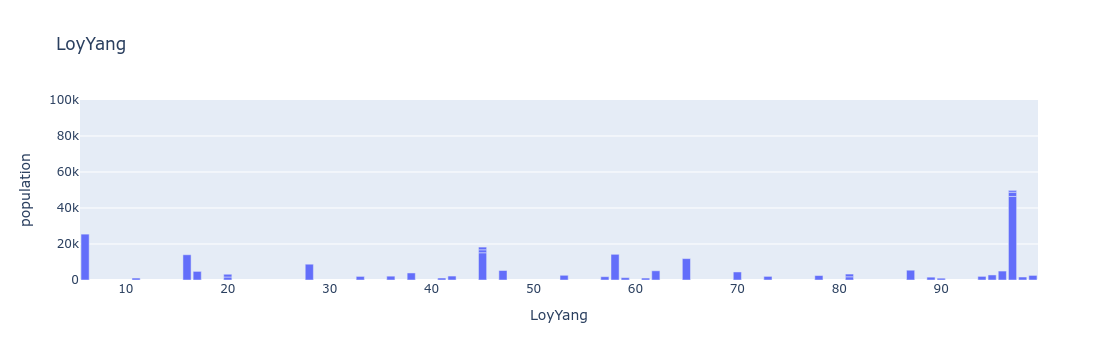

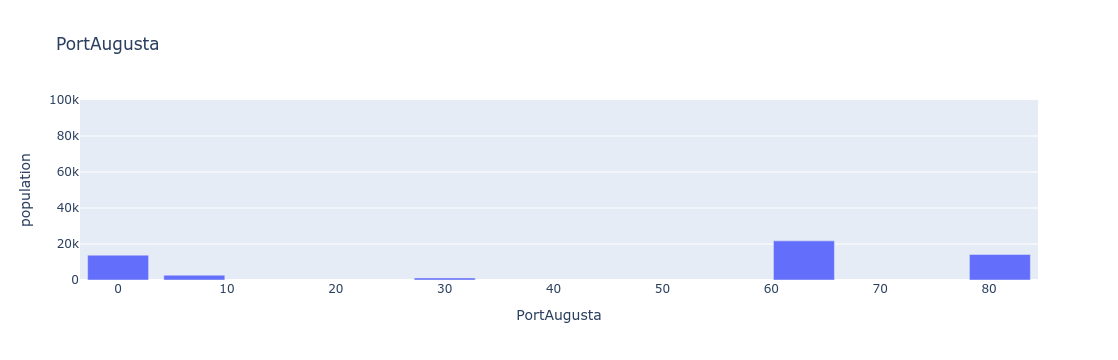

In [197]:
#Create scatter plot of each site showing the distance to the local city and it's population size

tarongfig = px.bar(Tarongdf, x= 'Tarong', y= 'population', title='Tarong', hover_name='city')
colliefig = px.bar(Colliedf, x= 'Collie', y= 'population', title='Collie', hover_name='city')
Callidefig = px.bar(Callidedf, x= 'Callide', y= 'population', title='Callide', hover_name='city')
Liddellfig = px.bar(Liddelldf, x= 'Liddel', y= 'population', title='Liddell',  hover_name='city')
MtPiperfig = px.bar(MtPiperdf, x= 'MtPiper', y= 'population', title='MtPiper', hover_name='city')
LoyYangfig = px.bar(LoyYangdf, x= 'LoyYang', y= 'population', title='LoyYang',  hover_name='city')
PortAugustafig = px.bar(PortAugustadf, x= 'PortAugusta', y= 'population', title='PortAugusta', hover_name='city')

tarongfig.update_layout(yaxis=dict(range=[0, 100000])) 
colliefig.update_layout(yaxis=dict(range=[0, 100000]))
Callidefig.update_layout(yaxis=dict(range=[0, 100000])) 
Liddellfig.update_layout(yaxis=dict(range=[0, 100000])) 
MtPiperfig.update_layout(yaxis=dict(range=[0, 100000]))
LoyYangfig.update_layout(yaxis=dict(range=[0, 100000]))
PortAugustafig.update_layout(yaxis=dict(range=[0, 100000]))

tarongfig.show()
colliefig.show()
Callidefig.show()
Liddellfig.show() 
MtPiperfig.show()
LoyYangfig.show()
PortAugustafig.show()
